# Muon Flux Data Reading
## Phys409
### Created By Daniel Yates

This notebook gives an example of how to import the Muon Flux Experiment data from the course Github into arrays within a Jupyter Notebook. Feel free to copy-paste this code into your logbook and modify as you see fit--don't forget to credit it, though!

In [13]:
#necessary imports
import requests
import io
import pandas as pd

#we are going to pull the data directly from the Github into the notebook as opposed to
#downloading it and then uploading it to your Jupyter server

#we need the url of all of the data first:
#Either of the below directories should work. If one doesn't try the other one


directoryUrl = 'https://raw.githubusercontent.com/dayates/PHYS409_UBC/master/Muons/Data/'
#directoryUrl = 'https://raw.githubusercontent.com/jonahberean/PHYS409_UBC/master/Muons/Data/'


#now we need a specific filename to look at:
fileName = '05082020_Scan1.dat'

#add the file name to the url of the data
url = directoryUrl + fileName

#now we will dowload that data
download = requests.get(url).content

#now, we have to read that file. It is a tab-separated file, so this will read it and put it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')),sep="\t")

#We want to convert from a pandas data frame into a numpy array
data = df.to_numpy()

#now, we want to take it from a 2-d numpy array and convert it to two lists
angle = data[:,0]
counts = data[:,1]

#let's print them out to see what they look like:
print(angle)
print(counts)


[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
[3977. 4067. 3637. 3026. 2621. 1916. 1729. 1345. 1290. 1166.]


Text(0.5, 1.0, 'Muon Flux vs. Angle')

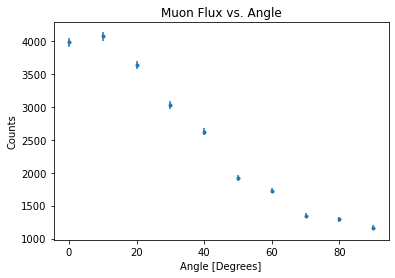

In [23]:
#plot the data

import matplotlib.pyplot as plt
import numpy as np
plt.errorbar(angle,counts,yerr=np.sqrt(counts),fmt='.')
plt.xlabel("Angle [Degrees]")
plt.ylabel("Counts")
plt.title("Muon Flux vs. Angle")

Text(0.6, 0.4, '$\\chi^2_r$ = 4.1')

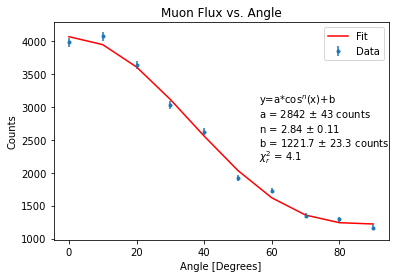

In [32]:
#do a fit to this data using I=I0*cos^n(x)+b
from scipy.optimize import curve_fit

#define the fit function
def func(x, a, b, c):
    return a * (np.cos(np.radians(x)))**b + c


#function for chi square calculation
def chi_square (popt, x, y, sigma):
    #if we don't have a sigma, assign it to be 1 by default
    if sigma is None:
        sigma = 1.
    return np.sum((y-func(x, *popt))**2/sigma**2)
    



#data fitting
popt, pcov = curve_fit(func, angle, counts,sigma=np.sqrt(counts), absolute_sigma=True,p0=[counts[0],3,100])

#chi-squared calclation
chiSquare = chi_square(popt,angle,counts,np.sqrt(counts))/(len(counts)-len(popt))


#figure creation (necessary to display text on the figure)
fig, ax = plt.subplots()

#plot the data and the best fit
plt.plot(angle, func(angle, *popt), 'r-', label="Fit")
plt.errorbar(angle,counts,yerr=np.sqrt(counts),fmt='.',label="Data")
plt.xlabel("Angle [Degrees]")
plt.ylabel("Counts")
plt.title("Muon Flux vs. Angle")
plt.legend(loc='best')

#plot the fit equation and results on the figure
plt.text(0.6,0.6,"y=a*cos$^n$(x)+b",transform = fig.transFigure)
plt.text(0.6,0.55,"a = {:.0f} $\pm$ {:.0f} counts" .format(round(popt[0],0),round(np.sqrt(pcov[0][0]),0)),transform = fig.transFigure)
plt.text(0.6,0.5,"n = {:.2f} $\pm$ {:.2f}" .format(round(popt[1],2),round(np.sqrt(pcov[1][1]),2)),transform = fig.transFigure)
plt.text(0.6,0.45,"b = {:.1f} $\pm$ {:.1f} counts" .format(round(popt[2],1),round(np.sqrt(pcov[2][2]),1)),transform = fig.transFigure)
plt.text(0.6,0.4,"$\chi^2_r$ = {:.1f}" .format(round(chiSquare,2)),transform = fig.transFigure)

## 